# TALLER ANALISIS DE SENTIMIENTOS
### Juan Rave
A continuacion se da respuesta a cada punto en su respectivo orden

1. Vamos importar el dataset usando pandas.<br>
> * Ten encuenta el .csv no tiene header
> * Crea una lista con el nombre de las columnas del header
> * imprime los 10 primero tweets usando el metodo head()
> * asigna al atributo encoding la codificacion "ISO-8859-1"
> * Cuales son los descriptores que nos aportan informacion para el analisis de sentimientos?
2. usando la funcion head imprime los 5 primero registros con sentimiento positivo.<br>
3. usando iloc accedamos al valor del segundo registro, de sentimiento positivo en el campo TEXTO.<br>
4. calculemos la longitud del tweet anterior.<br>
5. usando iloc accedamos al valor del primer registro, de sentimiento negativo en el campo TEXTO.<br>
6. calculemos la longitud del tweet anterior.<br>
7. usando el metodo drop() de los DataFrame, elimina los campos que no son necesarios para el analisis de sentimientos, recuerda ajustar un atributo en 1 y otro en True.
8. valida si hay filas con nan y en caso de que si usa el metodo .dropna(), ajusta el parametro inplace en True.
9. revisemos que la base de datos este balanceada. Cuantos registros hay que la clase positiva, negativa y neutra?
10. usando list comprehension asigna a la lista longitudtweets la longitud del texto con los tweets, luego calcula la longitud de la lista
11. <br>
> * con la lista anterior, usando import numpy as np e import matplotlib.pyplot as plt, crear un histograma. En el eje X del histograma esta la logitud de los tweets y en el eje Y el conteo de Tweets con la longitud dada.<br>
12. crea un boxplot con la lista longitudtweets.<br>
13. asignar la lista longitudtweets a una columna del DataFrame, llamar la columna "LONGITUD"<br>
14. En este punto deberias tener tres columnas<br>
Nota: en el momento que se creo el dataset Twitter solo admitia un maximo de 140 caracteres<br>
15. Imprimir los 10 primeros tweets con mas de 140 caracteres, calcular cuantos hay y buscar 3 posibles razones a esta situacion.<br>
16. Prueba las siguientes lineas:<br>
<br>
from bs4 import BeautifulSoup <br>
prueba = BeautifulSoup(df.TEXTO[747], 'lxml')<br>
print (prueba.get_text())<br>

Que diferencia hay entre el texto sin pasar por el parsing?<br>
17. Con las lineas anteriores construir una funcion que reciba una lista, serie o df y aplique el parsing a cada un de los elementos, al final la funcion debe regregar los textos procesados.
18. imprimir df.TEXTO[0], las paginas web nos dan informacion sobre los sentimientos?
19. usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR PAGINAS WEB',' ',df.TEXTO[0])
20. las menciones dan informacion sobre los sentimientos?
21. usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR LAS MENCIONES',' ',df.TEXTO[0])
22. vamos a eliminar lops #, numeros y signos de puntuacion. Usar re.sub(r"[a-zA-Z]", " ", df.TEXTO[5204])
23. explorar la siguiente expresion regular: re.sub(r"(.)\1{2,}",r'\1\1', text5)
24. con todo lo visto antes construir una funcion que tome todos los textos y los limpie. Nota: el orden es importante.
24. comparar los textos limpios con los sucios
25. graficas el boxplot y el histograma del texto limpio
26. sobre el texto limpio aplicar CountVectorizer y TfidfVectorizer, para obtener dos modelos de representacion de texto, no sin antes eliminar las stopwords
27. cuantos descriptores tenemos? ejemplo: print(len(count_vectorizer.get_feature_names()))
28. entrena 3 modelos y ajusta sus hiperparametros, usando lo visto en la reunion anterior. (El detalle del ajuste de hiperparametros se vera en reuniones posteriores)
29. aplica PCA y usando la regla de dedo selecciona los nuevos descriptores (regresar a la charla de reduccion de la dimension)
30. repite el paso 28 con los nuevos descriptores.
31. selecciona tu mejor modelo y guardalo <br>
32. usando la API de Twitter descarga 100 tweets sobre un politico, artista, marca o empresa
33. aplicale la funcion de preprocesamiento, recuerda que si en tu preprocesamiento usaste PCA, entonces, aca tambien lo debes hacer.
33. calcula el porcentaje de sentimientos positivos y negativos sobre tus elecciones del punto 32.

In [3]:
# 1. importar los dataset
import pandas as pd

columns = ['sentimiento', 'id', 'fecha', 'query', 'usuario', 'texto']

file_path_train = "data/training_feeling.csv"
file_path_test = "data/testdata_feeling.csv"

train_data = pd.read_csv(file_path_train, header=None, names=columns, encoding="ISO-8859-1")
test_data = pd.read_csv(file_path_test, header=None, names=columns, encoding="ISO-8859-1")

train_data.head(10)

,sentimiento,id,fecha,query,usuario,texto
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
train_data.shape

(1600000, 6)

#### Para el analisis de sentimientos los descriptores que nos aportan mayor informacion son el texto y posiblemente la fecha, extrayendo la hora, debido a que es factible encontrar algun patron que nos permita inferiri las horas en las cuales las personas estan mas propensas a tener ciertos sentimientos 

In [5]:
# 2 imprimir los primeros cinto sentimientos positivos
train_data[train_data.sentimiento == 4].head(5)


,sentimiento,id,fecha,query,usuario,texto
800000,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [6]:
# 3. usando iloc accedamos al valor del segundo registro, de sentimiento positivo en el campo TEXTO
tweet_ = train_data[train_data.sentimiento == 4].iloc[1].texto
print(tweet_)

im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!


In [7]:
# 4.  calculemos la longitud del tweet anterior.
len(tweet_)

72

In [8]:
# 5. usando iloc accedamos al valor del primer registro, de sentimiento negativo en el campo TEXTO
tweet_ = train_data[train_data.sentimiento == 0].iloc[0].texto
print(tweet_)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


In [9]:
# 6. calculemos la longitud del tweet anterior
len(tweet_)

115

In [10]:
# 7. usando el metodo drop() de los DataFrame, elimina los campos que no son necesarios para el analisis de sentimientos, recuerda ajustar un atributo en 1 y otro en True.
# eliminamos las columnas que no vamos a usar
train_data.drop(['fecha', 'query', 'usuario', 'id'], axis=1, inplace=True)

In [11]:
# 8. valida si hay filas con nan y en caso de que si usa el metodo .dropna(), ajusta el parametro inplace en True.
train_data.dropna(inplace=True)

In [12]:
# 9. revisemos que la base de datos este balanceada. Cuantos registros hay que la clase positiva, negativa y neutra?
train_data.sentimiento.value_counts()

4    800000
0    800000
Name: sentimiento, dtype: int64

#### tenemos 800.000 registros positivos y la misma cantidad negativa

In [13]:
# 10. usando list comprehension asigna a la lista longitudtweets la longitud del texto con los tweets,
longitudtweets = [len(text) for text in train_data.texto]

# luego calcula la longitud de la lista
print(len(longitudtweets))

1600000


In [14]:
# 11. con la lista anterior, usando import numpy as np e import matplotlib.pyplot as plt, 
# crear un histograma. En el eje X del histograma esta la logitud de los tweets y en el eje Y 
# el conteo de Tweets con la longitud dada.
import numpy as np 
import matplotlib.pyplot as plt

plt.hist(longitudtweets)

(array([3.79204e+05, 5.57826e+05, 3.78988e+05, 2.82844e+05, 9.78000e+02,
        9.80000e+01, 3.80000e+01, 1.30000e+01, 6.00000e+00, 5.00000e+00]),
 array([  6. ,  42.8,  79.6, 116.4, 153.2, 190. , 226.8, 263.6, 300.4,
        337.2, 374. ]),
 <a list of 10 Patch objects>)

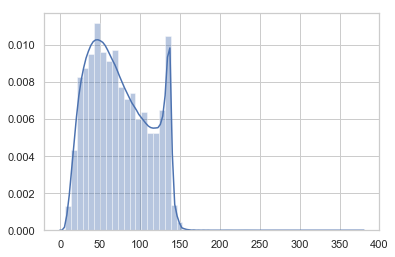

In [15]:
import seaborn as sns
sns.set(style="whitegrid")

sns.distplot(longitudtweets, kde=True)

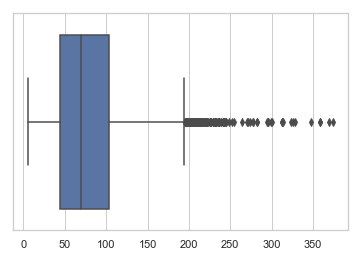

In [16]:
# 12. crea un boxplot con la lista longitudtweets.
sns.boxplot(longitudtweets, orient="h")

In [17]:
# 13. asignar la lista longitudtweets a una columna del DataFrame, llamar la columna "LONGITUD"
train_data["longitud"] = longitudtweets
train_data.head(1)

,sentimiento,texto,longitud
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115


In [18]:
# 14. En este punto deberias tener tres columnas
# Nota: en el momento que se creo el dataset Twitter solo admitia un maximo de 140 caracteres

In [19]:
# 15. Imprimir los 10 primeros tweets con mas de 140 caracteres, calcular cuantos hay y 
# buscar 3 posibles razones a esta situacion.
train_data[train_data.longitud > 140].head(10)

,sentimiento,texto,longitud
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141
1064,0,Why do I keep looking...I know that what I rea...,141


In [20]:
print("El numero total de tweet con mas de 140 caracteres es: " + str(len(train_data[train_data.longitud > 140])))

El numero total de tweet con mas de 140 caracteres es: 17174


#### las razones porque los tweet tienen mas de 140 caracteres son las siguientes
1. Codificacion, por lo cual caracteres especiales o tildes se encuentra codificados con caracteres de escape, pasando de un solo caracter a varios caracteres por simbolo.
2. Correos, los cuales no hacian parte del tweet
3. Menciones, a mas menciones, mayor longitud tendra el tweet

In [21]:
# 16. prueba las siguientes lineas
from bs4 import BeautifulSoup 

print("Texto sin ajustes: " + train_data.texto[747])
prueba = BeautifulSoup(train_data.texto[747], 'lxml')
print("Texto ajustado: " + prueba.get_text())

Texto sin ajustes: Have an invite for &quot;Healthy Dining&quot; session at Ashok Hotel today with Exec Chef R.Chopra but damn workload - will have to skip it! 
Texto ajustado: Have an invite for "Healthy Dining" session at Ashok Hotel today with Exec Chef R.Chopra but damn workload - will have to skip it! 


#### Que diferencia hay entre el texto sin pasar por el parsing?
Al pasar el texto por el parser, este reemplaza los caracteres de escape por caracteres normales, reduciendo la longitud del texto

In [22]:
# 17. Con las lineas anteriores construir una funcion que reciba una lista, serie o df y 
# aplique el parsing a cada un de los elementos, al final la funcion debe regregar los textos procesados
def beautifultext(data):
    data_ = []
    
    for i in range(len(data)): 
        data_.append(BeautifulSoup(data[i], 'lxml').get_text())
    
    return data_

beautifultext(train_data.texto.head(10))

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ']

In [23]:
# 18. imprimir df.TEXTO[0], las paginas web nos dan informacion sobre los sentimientos? NO
print("texto sin remover paginas web: "+ train_data.texto[0])

# 19. usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR PAGINAS WEB',' ',df.TEXTO[0])
import re
websites = r"((http|ftp)s?://[\w./]+)"
# reemplazamos los patrones asociados a paginas webs por espacios en blanco
re.sub(websites, '', train_data.texto[0])

texto sin remover paginas web: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [24]:
# 20. las menciones dan informacion sobre los sentimientos? NO
# 21. usar re.sub(r'ACA VA LA EXPRESION REGULAR PARA ENCONTRAR LAS MENCIONES',' ',df.TEXTO[0])
menciones = r"(\@[\w]+)"
re.sub(menciones, '', train_data.texto[0])

" http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [25]:
# 22. vamos a eliminar lops #, numeros y signos de puntuacion. Usar re.sub(r"[a-zA-Z]", " ", df.TEXTO[5204])
print(re.sub(r"[\W]+", " ", train_data.texto[5204]).strip())

# 23. explorar la siguiente expresion regular: re.sub(r"(.)\1{2,}",r'\1\1', text5)
re.sub(r"(.)\1{2,}",r'\1\1', train_data.texto[0])

untwitter the quot trash bin quot solution doesn t work the tweet is in the indexes and propagated even if it disappears from my personal list


"@switchfoot http://twitpic.com/2y1zl - Aww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [26]:
# 24. con todo lo visto antes construir una funcion que tome todos los textos y los limpie. 
# Nota: el orden es importante.
def cleantext(text):
    websites = r"((http|ftp)s?://[\w./]+)"
    menciones = r"(\@[\w]+)"
    
    return re.sub(r"(.)\1{2,}",r'\1\1', re.sub(r"[\W]+", " ", re.sub(menciones, '', re.sub(websites, '', text)))).strip()

In [27]:
cleantext(train_data.texto[0])

'Aww that s a bummer You shoulda got David Carr of Third Day to do it D'

In [28]:
# 25. comparar los textos limpios con los sucios
print("texto original: ", train_data.texto[0], "longitud: ", len(train_data.texto[0]))
print("texto transformado: ", cleantext(train_data.texto[0]), "longitud: ", len(cleantext(train_data.texto[0])))

texto original:  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D longitud:  115
texto transformado:  Aww that s a bummer You shoulda got David Carr of Third Day to do it D longitud:  70


In [29]:
# 26. graficas el boxplot y el histograma del texto limpio
# generamos una nueva lista con las longitudes de los textos transformados
cleantext_ = [cleantext(texto) for texto in train_data.texto]
lenghtcleantext_ = [len(texto) for texto in cleantext_]

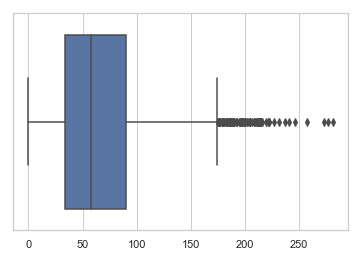

In [30]:
sns.boxplot(lenghtcleantext_, orient="h")

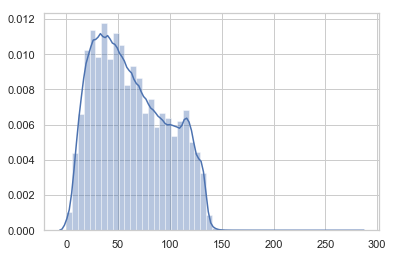

In [31]:
sns.distplot(lenghtcleantext_, kde=True)

In [32]:
train_data["texto"] = cleantext_
train_data["longitud"] = lenghtcleantext_

train_data = train_data[train_data.longitud <= 140]

In [33]:
# lematizamos los tweets, generando de nuevo los nuevos textos
import nltk
nltk.download('punkt')
nltk.download('wordnet')
  
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lematizetext(text):
    sentence_words = nltk.word_tokenize(text)
  
    stem_sentence=[]
    
    for word in sentence_words:
        stem_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

cleantext_ = [lematizetext(texto) for texto in train_data.texto]
train_data["texto"] = cleantext_

[nltk_data] Downloading package punkt to /Users/juan.rave/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/juan.rave/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# 27. sobre el texto limpio aplicar CountVectorizer y TfidfVectorizer, 
# para obtener dos modelos de representacion de texto, no sin antes eliminar las stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# convertimos texto en un vector de conteos eliminando los stopwords
count_vectorizer = CountVectorizer(min_df=5, ngram_range=(1,3),
                       strip_accents='unicode',
                       lowercase =True, analyzer='word', token_pattern=r'\w+',
                       stop_words = 'english')
#X_train_counts = count_vectorizer.fit_transform(train_data.texto)

# convertimos el texto en un vector de frecuencia eliminando los stopwords
tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,3),
                        strip_accents='unicode',
                        lowercase =True, analyzer='word', token_pattern=r'\w+',
                        use_idf=True, smooth_idf=True, sublinear_tf=True, 
                        stop_words = 'english')
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data.texto)

In [39]:
# 28. cuantos descriptores tenemos? ejemplo: print(len(count_vectorizer.get_feature_names()))
print(len(tfidf_vectorizer.get_feature_names()))

341720


In [40]:
# 29. entrena 3 modelos y ajusta sus hiperparametros, usando lo visto en la reunion anterior. 
# separamos el conjunto de datos en entrenamiento y pruebas
from sklearn.model_selection import train_test_split

y = train_data.sentimiento
X_train, X_test, y_train, y_test = train_test_split(train_data.texto, y, test_size=0.30, random_state=5)

tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1,3),
                        strip_accents='unicode',
                        lowercase =True, analyzer='word', token_pattern=r'\w+',
                        use_idf=True, smooth_idf=True, sublinear_tf=True, 
                        stop_words = 'english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

yr_train = [1 if r == 4 else 0 for r in y_train]
yr_test = [1 if r == 4 else 0 for r in y_test]

X_train_tfidf.shape

(1118899, 240263)

In [41]:
# modelo 1 Native bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

target_names = ['Negativo', 'Positivo']

nb = MultinomialNB()
nb.fit(X_train_tfidf, yr_train)
predictions = nb.predict(X_test_tfidf)

print("Multinomial naive bayes accuracy: {0}".format(accuracy_score(yr_test, predictions) ))
print(metrics.classification_report(yr_test, predictions, target_names=target_names))

Multinomial naive bayes accuracy: 0.7731252958632324
              precision    recall  f1-score   support

    Negativo       0.78      0.76      0.77    239865
    Positivo       0.77      0.78      0.78    239664

    accuracy                           0.77    479529
   macro avg       0.77      0.77      0.77    479529
weighted avg       0.77      0.77      0.77    479529



In [42]:
# modelo 2 
from sklearn.linear_model import SGDClassifier

sgc = SGDClassifier()
sgc.fit(X_train_tfidf, yr_train)
predictions = sgc.predict(X_test_tfidf)

print("SGD: {0}".format(accuracy_score(yr_test, predictions) ))
print(metrics.classification_report(yr_test, predictions, target_names=target_names))

SGD: 0.7569281524162251
              precision    recall  f1-score   support

    Negativo       0.79      0.70      0.74    239865
    Positivo       0.73      0.81      0.77    239664

    accuracy                           0.76    479529
   macro avg       0.76      0.76      0.76    479529
weighted avg       0.76      0.76      0.76    479529



In [43]:
# modelo 3 SVC
from sklearn.svm import LinearSVC

C=5
svc = LinearSVC(C=C)
svc.fit(X_train_tfidf, yr_train)
predictions = svc.predict(X_test_tfidf)

print("LinearSVC: {0}".format(accuracy_score(yr_test, predictions)))
print(metrics.classification_report(yr_test, predictions, target_names=target_names))

LinearSVC: 0.7594702301633478
              precision    recall  f1-score   support

    Negativo       0.77      0.74      0.76    239865
    Positivo       0.75      0.78      0.76    239664

    accuracy                           0.76    479529
   macro avg       0.76      0.76      0.76    479529
weighted avg       0.76      0.76      0.76    479529



In [ ]:
# 30. aplica PCA y usando la regla de dedo selecciona los nuevos descriptores (regresar a la charla de reduccion de la dimension)
from sklearn.decomposition import TruncatedSVD

# se hace necesario usar Singular value decomposition (SVD), debido a que la matrix de las caracteristicas 
# es dispersa, y PCA no puede operar sobre este tipo de matrices.

# Esto no se pudo correr debido a que a pesar de tener 25 Gb de memoria no fue posible realizar el entreganmiento 
# y transformacion de los datos

# corremos Truncate SVD con todas las caracteristicas del dataset menos 1
svd = TruncatedSVD(n_components=X_train_tfidf.shape[1]-1)
X_train_tfidf_svd = svd.fit_transform(X_train_tfidf) 

# creamos una lista con las explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

print("svd.components_:", svd.components_)
print("svd.explained_variance_:", svd.explained_variance_)


In [ ]:
# para conocer el numero optimo de componentes, realizamos un ciclo para graficar la proporcion de varianza 
# para cada numero de componentes usando Truncated SVD
n_comp = [5000,10000,20000,50000,100000,150000,200000] # list containing different values of components
explained = [] 
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(X_train_tfidf)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))

plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()


In [43]:
# tambien, se crea una funcion para obtener la cantidad de caracteristicas o componentes que capturen la proporcion
# de varianza del umbral enviado como parametro
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    
    # por cada caracteristica
    for explained_variance in var_ratio:
        # sumamos explained variance al total
        total_variance += explained_variance
        # incrementamos en 1 el numero de componentes
        n_components += 1
        
        # si alcanzamos el umbral
        if total_variance >= goal_var:
            break
            
    return n_components

select_n_components(tsvd_var_ratios, 0.8)

In [125]:
# 31. repite el paso 28 con los nuevos descriptores.
# no fue posible el calculo de los nuevos descriptores, al no utilizar TruncateSVD
from sklearn.pipeline import Pipeline

# generamos un pipeline para nuestra corrida el cual tiene como objeto realizar
# la transformacion y entrenar el modelo con NB
text_pp = Pipeline([('tfidf', TfidfVectorizer(min_df=5, ngram_range=(1,3),
                                strip_accents='unicode',
                                lowercase =True, analyzer='word', token_pattern=r'\w+',
                                use_idf=True, smooth_idf=True, sublinear_tf=True, 
                                stop_words = 'english')),
                    #('transform', TruncatedSVD(n_components=5000)),
                     ('nb', MultinomialNB()), ])

# optimizamos el modelo a traves de Grid Search
from sklearn.model_selection import GridSearchCV
parameters = {'tfidf__min_df': (1, 2, 3, 5, 10),
              'tfidf__use_idf': (True, False),
              'tfidf__smooth_idf': (True, False),
              'tfidf__max_features': (50000, 100000, 150000, 200000, 240000),
              'nb__alpha': (0.0, 1.0),
              'nb__fit_prior': (True, False),
#              'transform__n_components': (5000, 10000, 20000, 50000),
}

gs_clf = GridSearchCV(text_pp, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_train, yr_train)

print("gs_clf.best_score_", gs_clf.best_score_)
print("gs_clf.best_params_", gs_clf.best_params_)

/Users/juan.rave/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


gs_clf.best_score_ 0.7726220150344222
gs_clf.best_params_ {'tfidf__max_features': 240000, 'tfidf__min_df': 1, 'tfidf__use_idf': False}


In [126]:
# redifinimos nuestro pipeline para vectorizar y entrenamos nuestro modelo con el modelo de regresion lineal MultinomialNB, de acuerdo a los mejores parametros
# entregados por GridSearch
text_pp = Pipeline([('tfidf', TfidfVectorizer(min_df=1, ngram_range=(1,3),
                                strip_accents='unicode', max_features=240000,
                                lowercase =True, analyzer='word', token_pattern=r'\w+',
                                use_idf=False, smooth_idf=True, sublinear_tf=True, 
                                stop_words = 'english')),
                     ('nb', MultinomialNB(alpha=1.0, fit_prior=True)), ])

text_pp = text_pp.fit(X_train, yr_train)
predictions = text_pp.predict(X_test)

print("accuracy_score: {0}".format(accuracy_score(yr_test, predictions)))
print(metrics.classification_report(yr_test, predictions, target_names=target_names))

accuracy_score: 0.7755464215928547
              precision    recall  f1-score   support

    Negativo       0.78      0.77      0.77    239865
    Positivo       0.77      0.78      0.78    239664

    accuracy                           0.78    479529
   macro avg       0.78      0.78      0.78    479529
weighted avg       0.78      0.78      0.78    479529



In [127]:
# 32. selecciona tu mejor modelo y guardalo 
import pickle 
  
# guardamos el modelo entrenado como pickle string. 
pkl_filename = "analisis_sentimientos.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(nb, file)
    
# cargamos el pickled model 
with open(pkl_filename, 'rb') as file:
    nb_from_pickle = pickle.load(file)
    
# usamos el pickle modelo para predecir
#nb_from_pickle.predict(X_test)

In [130]:
# 33. usando la API de Twitter descarga 100 tweets sobre un politico, artista, marca o empresa
# instalamos la libreria
#pip install -- tweepy

import tweepy

consumer_key="QHNHbZR7jxHMf7kC1N8hQ3SRC"
consumer_secret="3k6XmX63alXVy2ENg5VzFp9lsh3IJw1AHxB34eFO3zabg4JNzE"

access_token="293500908-rOUKJrogROUzRFqfoIeAnfTEXGkNiTkitd0srDcU"
access_token_secret="tjvx1UgOo2i78LBOYGrUe7C27qxHOPazDSBSaxLhIf8SC"

In [129]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api=tweepy.API(auth,wait_on_rate_limit=True)

query = input("Indique el criterio de analisis: ")

max_tweets = 100

tweets=[]
for tweet_info in tweepy.Cursor(api.search, q=query, lang = 'en', tweet_mode='extended').items(max_tweets):
    if 'retweeted_status' in dir(tweet_info):
        tweet=tweet_info.retweeted_status.full_text
        tweets.append(tweet)
    else:
        tweet=tweet_info.full_text
        tweets.append(tweet)

Indique el criterio de analisis: Ivan Duque


In [138]:
# 34. aplicale la funcion de preprocesamiento, recuerda que si en tu preprocesamiento usaste PCA, entonces, 
# aca tambien lo debes hacer.

# limpiamos el texto de urls y menciones a traves de nuestra funcion y expresiones regulares
cleantext_ = [cleantext(texto) for texto in tweets]
# lematizamos el texto
cleantext_ = [lematizetext(texto) for texto in cleantext_]

predictions = text_pp.predict(cleantext_)

print(list(predictions))

[0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [139]:
# 35. calcula el porcentaje de sentimientos positivos y negativos sobre tus elecciones del punto 32.
print('Porcentaje sentimientos positivos para ' + query + " es: " + str(len(predictions[predictions == 1])) + '%')
print('Porcentaje sentimientos negativos: '+ str(len(predictions[predictions == 0]))+'%')

Porcentaje sentimientos positivos para Ivan Duque es: 47%
Porcentaje sentimientos negativos: 53%


In [140]:
# obtenemos los indices para los tweets positivos
result = np.where(predictions == 1)

In [141]:
# imprimimos el listado de los tweets con sentimiento positivo
for index in result[0]:
    print('[', index, ']', ":", cleantext_[index])

[ 2 ] : SDGSummit Iván Duque President of Colombia We organize our development agenda in a 4 year Plan call Pact for Colombia Pact for equity align to the SDGs We focus on SDG10 because social justice be relevant and necessary 
[ 3 ] : The president of Colombia Ivan Duque speak at the Latin American Venture Capital Assn annual meet in NYC Delivering practical and real support and endorsement for foster foreign Private Equity investment in his country 
[ 6 ] : Colombian President Ivan duque and Head David Malpass speak about growth opportunities in Latin America touch on trade climatechange and regional issue such as the Amazon and Venezuela Concordia19 
[ 8 ] : Colombian President Ivan duque and Head David Malpass speak about growth opportunities in Latin America touch on trade climatechange and regional issue such as the Amazon and Venezuela Concordia19 
[ 10 ] : We be see an interest change regard Venezuela Last year Maduro come to the UNGA as if nothing have happen Today we have a c